In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv("hotel_bookings.csv")

In [20]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          0.0   0.464043                0.0               July   
1  Resort Hotel          0.0   1.000000                0.0               July   
2  Resort Hotel          0.0   0.009498                0.0               July   
3  Resort Hotel          0.0   0.017639                0.0               July   
4  Resort Hotel          0.0   0.018996                0.0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                       0.5                        0.0   
1                       0.5                        0.0   
2                       0.5                        0.0   
3                       0.5                        0.0   
4                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  ...  deposit_type  \
0                      0.0                  0.00  0.036364  ...    No Deposit   
1 

In [4]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1634

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11848\3994776710.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [7]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%              

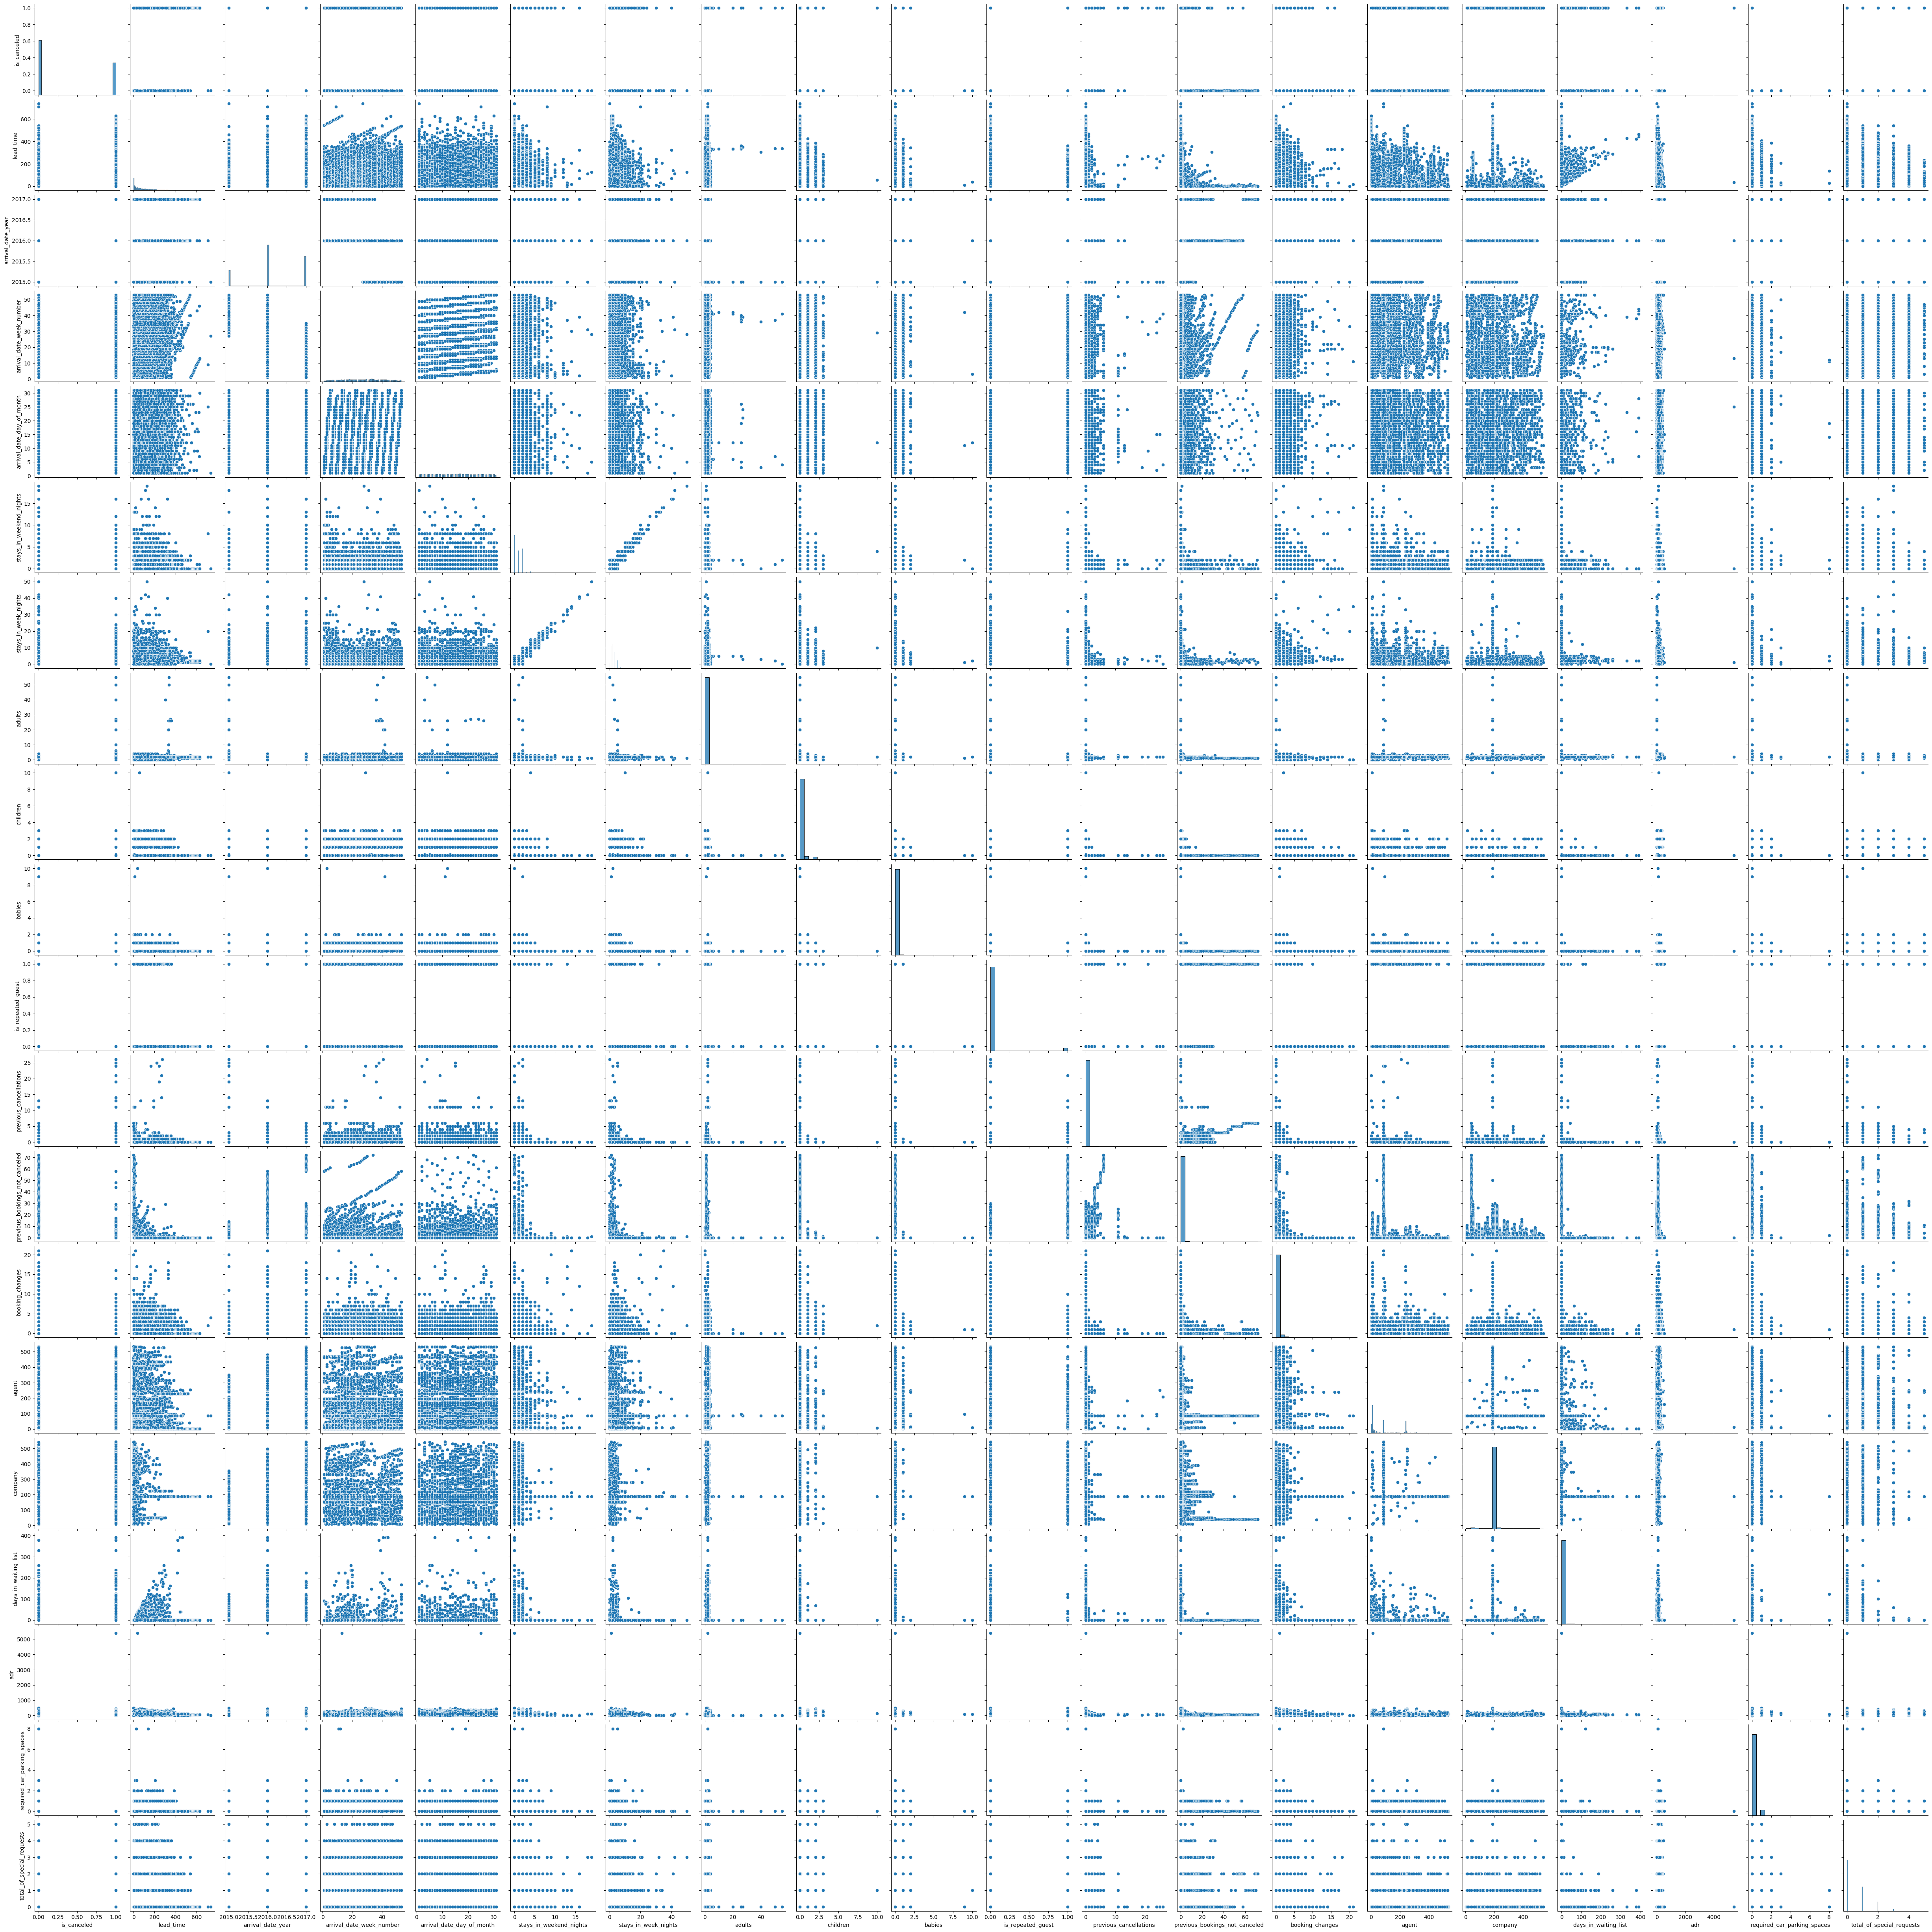

In [8]:
sns.pairplot(df)
plt.show()

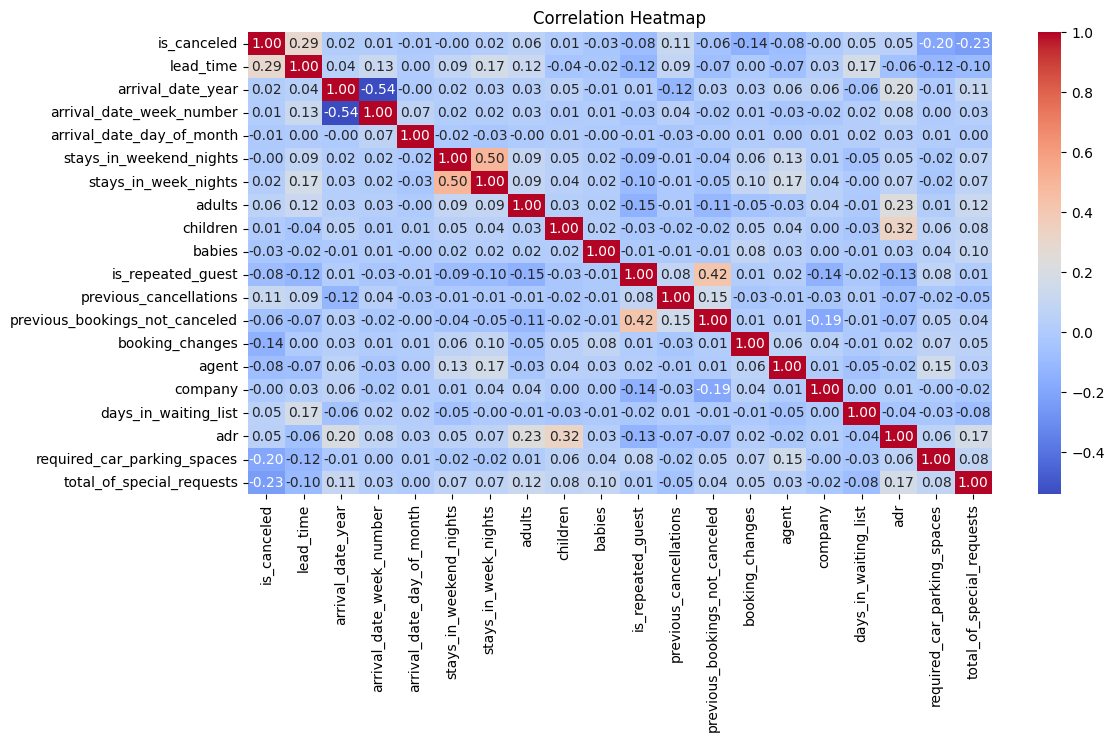

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData after Normalization:\n", df.head())


Data after Normalization:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          0.0   0.464043                0.0               July   
1  Resort Hotel          0.0   1.000000                0.0               July   
2  Resort Hotel          0.0   0.009498                0.0               July   
3  Resort Hotel          0.0   0.017639                0.0               July   
4  Resort Hotel          0.0   0.018996                0.0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                       0.5                        0.0   
1                       0.5                        0.0   
2                       0.5                        0.0   
3                       0.5                        0.0   
4                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  ...  deposit_type  \
0                      0.0                  0.00  0.036

In [11]:
df.to_csv("normalized_dataset.csv", index=False)

In [17]:
column_name = 'adults'

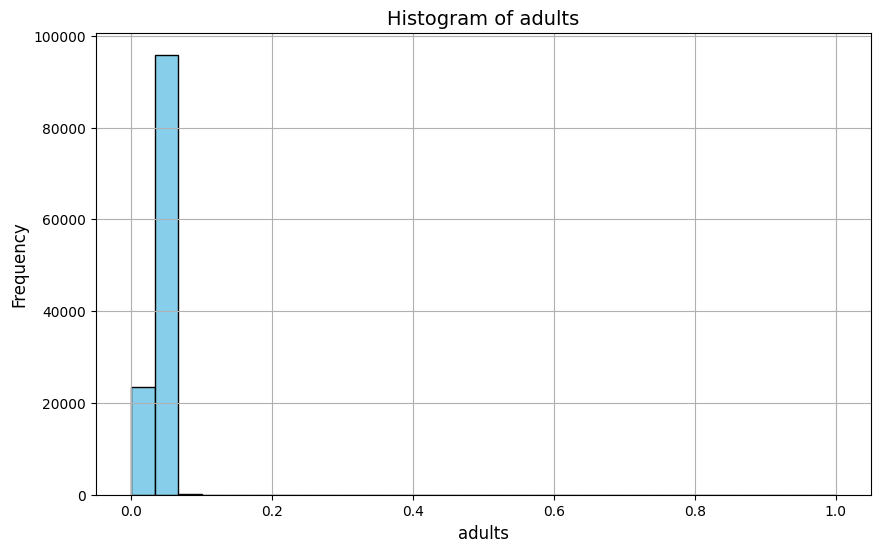

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins=30, edgecolor="black", color='skyblue')  # You can adjust the number of bins
plt.title(f"Histogram of {column_name}", fontsize=14)
plt.xlabel(column_name, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


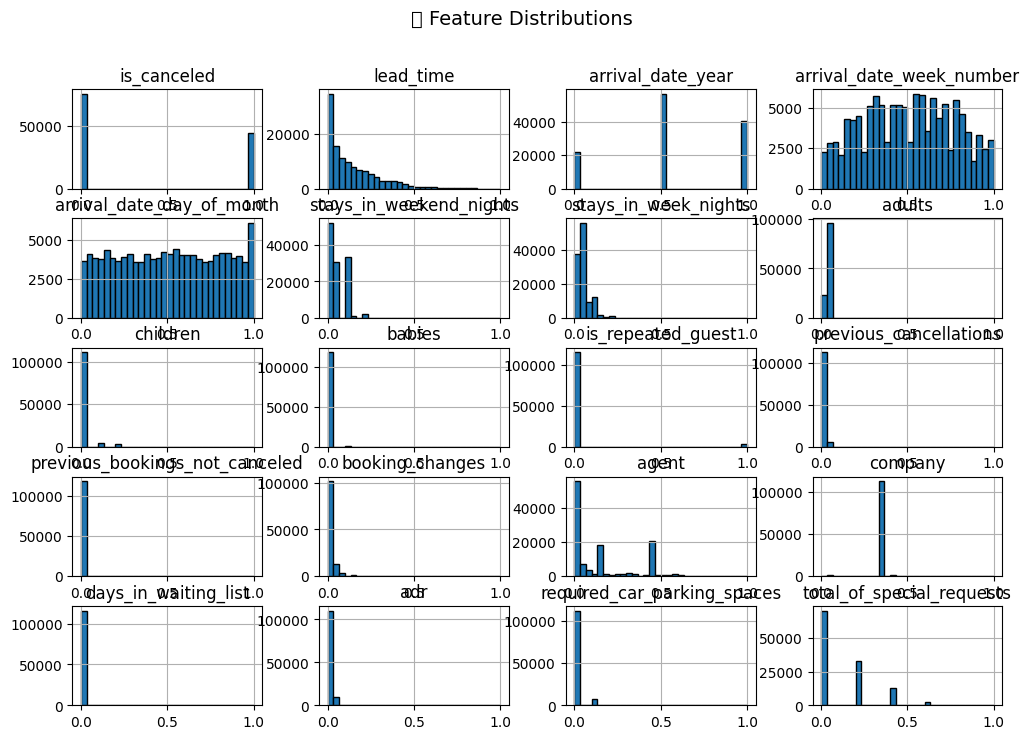

In [19]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("🔹 Feature Distributions", fontsize=14)
plt.show()